# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2007%20-%20A%CC%81rvores%20I/Exerci%CC%81cio%201/demo01_dummies.csv')
df = df.set_index('Unnamed: 0').reset_index(drop=True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   int64  
 10  posse_de_veiculo_Y                      6770 non-null   int6

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
2,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
3,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,27.482192,4.024658,1,0,1,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,34.857534,3.101370,1,1,1,0,1.0,True,0,...,0,0,1,0,0,1,0,0,0,0
6766,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,0,0,0,0,1,0,0,0,0
6767,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
6768,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0


In [14]:
# X = Variáveis explicativas:
X = df.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):', 
      X.shape, '\n')

# y = Variável resposta:
y = df.mau
print('Quantidade de linhas da variável resposta (y):', 
      len(y), '\n\n')

# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):', 
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', 
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):', 
      len(y_train))
print('Quantidade de linhas de y_test (30%):', 
      len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (6770, 32) 

Quantidade de linhas da variável resposta (y): 6770 


Quantidade de linhas e colunas de X_train (70%): (4739, 32)
Quantidade de linhas e colunas de X_test (30%): (2031, 32) 

Quantidade de linhas de y_train (70%): 4739
Quantidade de linhas de y_test (30%): 2031


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
# 1) Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [16]:
# 2) Treine o modelo com os dados que você separou para treinamento.

clf = clf.fit(X=X_train, 
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

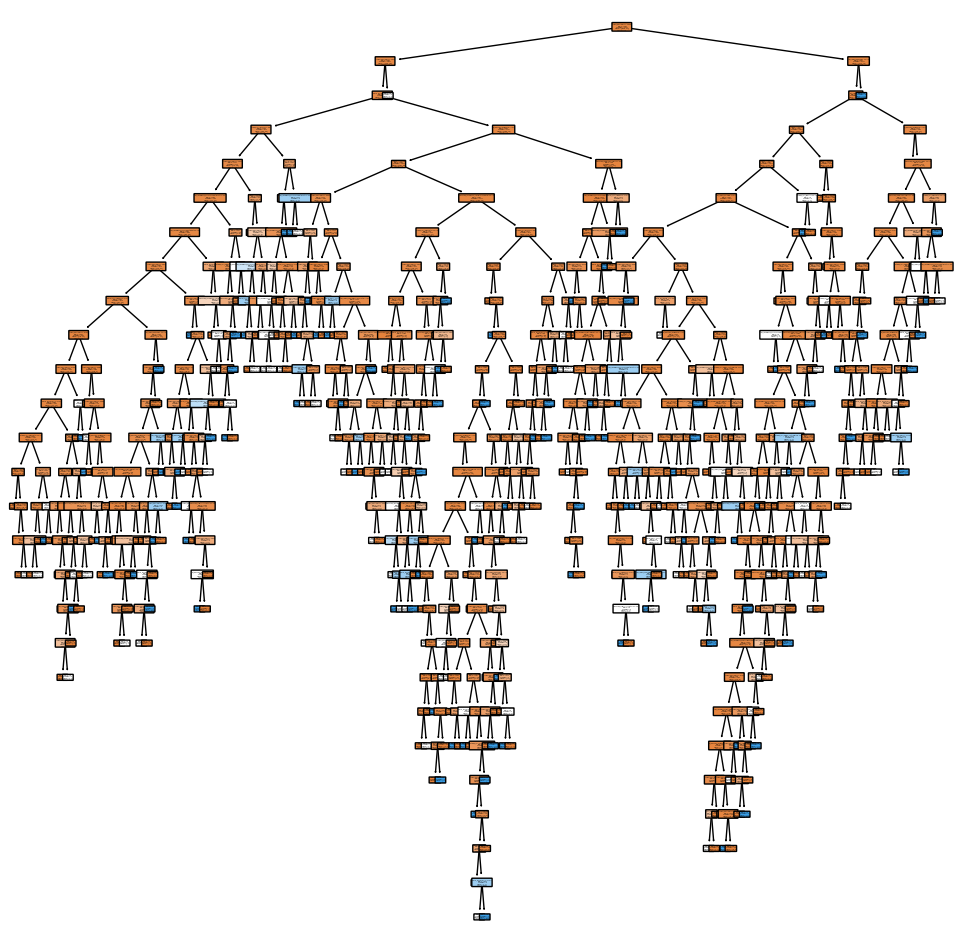

In [17]:
# 3) Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(12,12))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['bons', 'maus'],
          filled=True, 
          rounded=True)

plt.show()

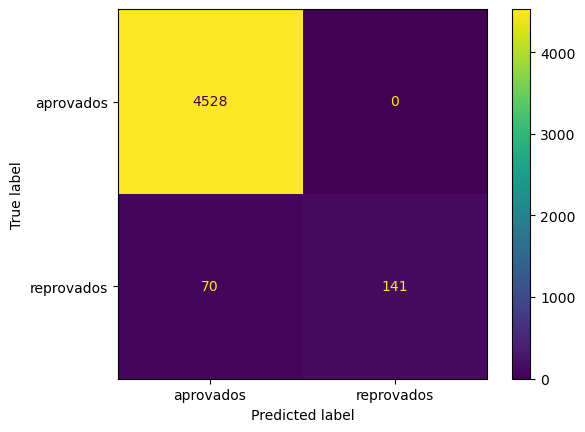

In [23]:
# 4) Produza uma visualização da matriz de classificação (ou matriz de confusão) - 
#    coloque os rótulos como "aprovados" e "reprovados" - 
#    pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

ConfusionMatrixDisplay.from_estimator(clf, 
                      X_train, 
                      y_train, 
                      display_labels=['aprovados', 'reprovados'])

plt.show()

In [24]:
# 5) Calcule a acurácia na base de treinamento.

print('Acurácia na base de treinamento:')
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train, 
               y_pred=predict_train)

Acurácia na base de treinamento:


0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [25]:
# 1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

predict_test = clf.predict(X=X_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    1930
True      101
dtype: int64 

Valores reais:
False    1944
True       87
Name: mau, dtype: int64


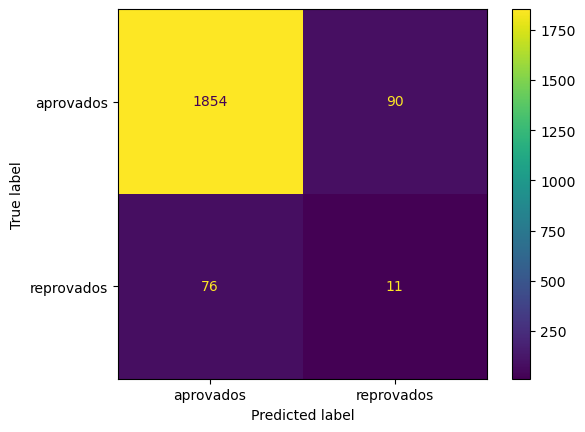

In [26]:
# 2) Produza a visualização da matriz de confusão para a base de teste.

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

In [27]:

# 3) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9182668636139832 

Acurácia da base de treinamento: 0.9852289512555391


In [28]:

# 4) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#    Use o random_state = 123. Avalie a matriz de classificação. 
#    Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)

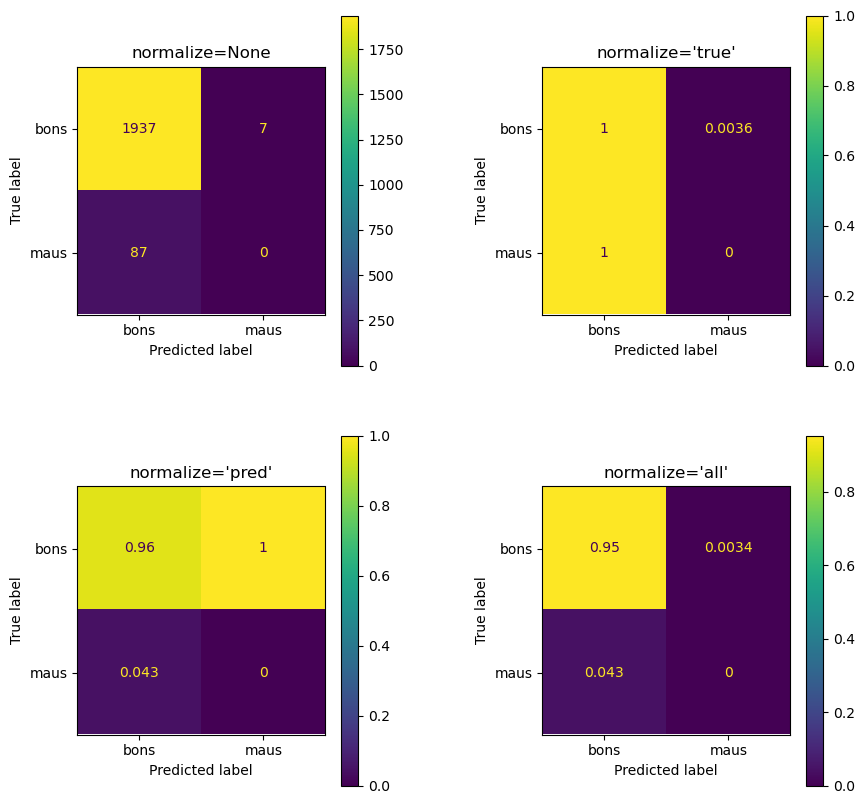

In [29]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize=None, 
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='true', 
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='pred', 
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='all', 
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [30]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


In [31]:
# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

print("Valores reais:")
print(pd.Series(y_test).value_counts(), 
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=y_test, 
                           y_pred=y_test.replace(to_replace=True, 
                                                 value=False)
                          ) * 100,
            2), 
      '%')

Valores reais:
False    1944
True       87
Name: mau, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
False    2031
Name: mau, dtype: int64 

Acurácia: 95.72 %
